# Projeto 2 - Ciência dos Dados
### Eduardo Tirta, José Fernando, Patrick dos Santos

## Introdução

Esse relatório trata-se da Análise Descritiva e Inferêncial da Interface de um Portfólio, esse portfólio foi desenvolvido na durante o projeto 1 de Co-design de Aplicativos e fizemos duas versões de interfase, A e B. A diferença entre elas é o arranjo dos menus que contém no Portfólio, a interfase A está com o menu com forma de grade, e a interfase B está com o menu com uma única coluna. Assim, o nosso grupo procura estabelecer qual das duas interfaces é mais eficaz.

Como queremos determinar a eficaz de cada interface, iremos usar, como váriavel, o tempo de navegação de um usuário para completar uma certa tarefa utilizando os dois tipos de interface. A tarefa que o grupo selecionou para realizar essa análise é de acessar a página projeto final de design de software (PETinder), presente no Portfólio.

<img src="testeA.png">
Interface A

<img src="testeB.png">
Interface B

## Desenvolvimento

### Inicialização do projeto

Primeiramente, antes de começarmos a fazer a analise dos dados, precisamos coletar eles e criar uma instância onde estarão esses dados. Durante o projeto, espalhamos um link onde o usuários conseguia acessar o portfólio e realizar a tarefa, o tempo de acesso era salvo no Firebase sendo associado com a versão que foi utilizada. Assim só foi preciso retirar os dados do Firebase.

A seguir estará o código inicial da nossa análise onde pegamos os dados do Firebase e retiramos dados que tiveram algum problema ou que não fazem muito sentido, como tempo muito alto ou tempo negativo.

In [1]:
import pandas as pd
import json
import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
arquivo = open("testeab-8de6a-export.json")
linhas = arquivo.readlines()
texto = "".join(linhas)
dados_fire = json.loads(texto)

In [3]:
for k,v in dados_fire["testeab-8de6a"].items():
    # print(k,v) # habilite para imprimir as chaves de mais alto nível
    for chave, valor in v.items():
        # print(chave, valor) # habilite para imprimir as chaves inferiores
        pass # desabilite quando reabilitar a linha de cima

In [4]:
lista_dicionarios = []

for k,v in dados_fire["testeab-8de6a"].items():
    lista_dicionarios.append(v)

In [5]:
dataframe = pd.DataFrame.from_records(lista_dicionarios)

In [6]:
dataframe

,tempo,tipo,user_id,versao
0,1478263255649,medio,2299771869,B
1,1478288409069,inicio,3309030230,A
2,1478534363059,inicio,280871320,B
3,1478523959022,inicio,3220108444,B
4,1478518100162,medio,328675274,B
5,1478523642992,inicio,853823534,B
6,1478524122198,final,3789181448,A
7,1479317365257,final,3774183163,B
8,1479317170088,medio,3774183163,B
9,1478525293666,medio,278835118,B


In [7]:
agrupado = dataframe.groupby(by=["user_id", "versao"])

In [8]:
users = set(dataframe.user_id) # We convert it to a set so that each user appear only once

In [9]:
users = list(users) 

In [10]:
resultados = []

for u in users:
    for versao in ["A", "B"]:
        if (u, versao) in agrupado.groups.keys(): # Check if a specific pair user/type of test happened
            grupo1 =  agrupado.get_group((u, versao))
            grupo1 = grupo1.sort_values(by="tempo") # Para evitar que inícios sem fim gerem tempos negativos
            
            if len(grupo1[grupo1.tipo=="final"])>= 1 and len(grupo1[grupo1.tipo=="medio"])>= 1 and len(grupo1[grupo1.tipo=="inicio"]) >= 1:
                delta_t1 = grupo1[grupo1.tipo=="medio"].iloc[-1].tempo - grupo1[grupo1.tipo=="inicio"].iloc[0].tempo
                delta_t2 = grupo1[grupo1.tipo=="final"].iloc[-1].tempo - grupo1[grupo1.tipo=="medio"].iloc[0].tempo
                
                resultados.append({"user_id":u, "delta_t1":delta_t1, "delta_t2":delta_t2, "versao":versao})

In [11]:
grupo1.sort_values(by="tempo")

,tempo,tipo,user_id,versao
14,1478566685968,inicio,968803455,B


In [12]:
dataframe_resumo = pd.DataFrame.from_records(resultados)

In [13]:
# Convertendo milissegundos em segundos
dataframe_resumo.delta_t1/=1000 
dataframe_resumo.delta_t2/=1000 

In [14]:
dataframe_resumo

,delta_t1,delta_t2,user_id,versao
0,8.994,6.859,1561760900,A
1,2.100,9.034,3789181448,A
2,2.040,4.632,3141974280,A
3,3.058,2.500,226968087,A
4,2.563,6.325,226968087,B
5,2.173,7.642,280871320,B
6,234.291,8.446,2498306715,A
7,59.415,36.845,1154051230,A
8,2.231,3.344,3946099743,A
9,2.551,20.987,3946099743,B


Depois separamos os dados corretos para cada interface, assim poderá ser analisado e comparado um com o outro:

In [15]:
resultados_A=dataframe_resumo.query('versao == "A" and delta_t1 < 100 and delta_t1>0')
resultados_B=dataframe_resumo.query('versao == "B" and delta_t1 < 100 and delta_t1>0')
print(dataframe_resumo)
print(resultados_A)
print(resultados_B)

      delta_t1   delta_t2     user_id versao
0        8.994      6.859  1561760900      A
1        2.100      9.034  3789181448      A
2        2.040      4.632  3141974280      A
3        3.058      2.500   226968087      A
4        2.563      6.325   226968087      B
5        2.173      7.642   280871320      B
6      234.291      8.446  2498306715      A
7       59.415     36.845  1154051230      A
8        2.231      3.344  3946099743      A
9        2.551     20.987  3946099743      B
10       5.733      7.979  3649128606      B
11   57003.728  56962.655  3167377320      A
12       1.569      5.784   278835118      B
13       2.521      2.327  3187205062      A
14  968527.686      7.271  3187205062      B
15       3.453      5.745  2463145929      A
16       1.627      3.273   328675274      B
17       3.014      6.438   105061458      A
18       4.431      8.263  3309030230      B
19       4.790      8.302   637707993      B
20       2.120      3.238   931274072      A
21       4

### Análise Descritiva

Até então, temos os dados que serão analisados, já separamos para cada tipo de interface. A inicio de análise, começaremos plotando vários histogramas, o primeiro histograma está tudo junto, assim a visualização e a interpretação fica mais complicado.

[0, 60, 0, 5]

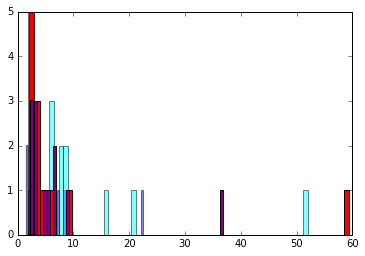

In [16]:
tempos_A2 = list(resultados_A[resultados_A.versao=="A"].delta_t2)
tempos_A1 = list(resultados_A[resultados_A.versao=="A"].delta_t1)
tempos_B1 = list(resultados_B[resultados_B.versao=="B"].delta_t1)
tempos_B2 = list(resultados_B[resultados_B.versao=="B"].delta_t2)
plt.hist(tempos_B1, bins=60, alpha=0.5,color="blue")
plt.hist(tempos_B2, bins=60, alpha=0.5, color="cyan")
plt.hist(tempos_A1, bins=60, color="red")
plt.hist(tempos_A2, bins=60, color="purple")

plt.axis([0,60,0,5])

Assim, para melhor interpretação, iremos plotar vários histogramas diferentes, comparando o tempo na primeira página com a segunda para as interfaces A e B e comparar A e B em relação a cada página. A seguir estamos comparando o tempo da primeira página da interface A e o tempo da segunda página da interface A:

[0, 60, 0, 5]

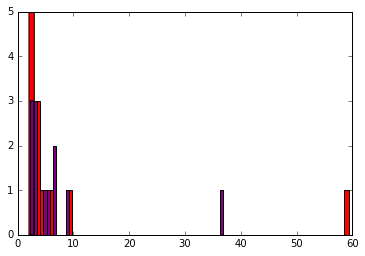

In [17]:
tempos_A2 = list(resultados_A[resultados_A.versao=="A"].delta_t2)
tempos_A1 = list(resultados_A[resultados_A.versao=="A"].delta_t1)
plt.hist(tempos_A1, bins=60, color="red")
plt.hist(tempos_A2, bins=60, color="purple")

plt.axis([0,60,0,5])

Podemos descobrir com esse primeiro histograma que temos poucos dados, alguns fora da média, porém já podemos ter uma ideia em relação ao tempo da primeira página da interface A, percebemos que ela tem um grande número perto de zero, bem maior em relação ao da segunda página, o que podemos dizer que foi encontrado o item na página 1 com a interface A mais rápida do que na página 2. Mas mesmo assim não conseguimos determinar qual tem uma média de tempo melhor que a outra e fazendo a interpretação dessa maneira pode gerar conclusões confusas e sem base. Assim procuraremos implementar esses dados.

Isso foi repetido novamente com a interface B, comparamos o seu tempo na primeira página com a segunda e podemos ver isso a seguir:

[0, 60, 0, 5]

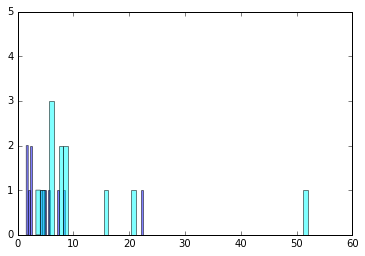

In [18]:
tempos_B1 = list(resultados_B[resultados_B.versao=="B"].delta_t1)
tempos_B2 = list(resultados_B[resultados_B.versao=="B"].delta_t2)
plt.hist(tempos_B1, bins=60, alpha=0.5,color="blue")
plt.hist(tempos_B2, bins=60, alpha=0.5, color="cyan")


plt.axis([0,60,0,5])

Podemos ver que para o tempo da segunda página da interface B esta mais concentrado um pouco longe de zero, sendo o tempo da primeira página concentrado mais proximo de zero, podemos dizer que na maioria das vezes, foi mais fácil encontrar o item na página um do que na página dois. Mesmo assim, teremos o mesmo problema encontrado no primeiro histograma, é dificil tirar conclusões de algo ainda simples. Dessa maneira partiremos para algo que dá mais detalhe da lista, que é a contrução de boxplots e usando a função describe para dar detalhes das nossas amostras.

Mas antes de fazer essa análise descritiva mais confiável, será disponivel a seguir mais duas comparações, Tempo da página 1 pela interface A e pela interface B e Tempo da página 2 pela interface A e pela interface B. Podemos tirar certas conclusões mas elas não são muito confiáveis, assim podemos avançar para a construção dos boxplots e o uso do describe.

[0, 60, 0, 5]

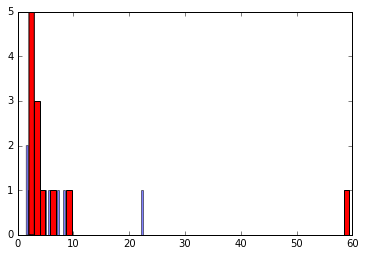

In [19]:
tempos_A1 = list(resultados_A[resultados_A.versao=="A"].delta_t1)
tempos_B1 = list(resultados_B[resultados_B.versao=="B"].delta_t1)
plt.hist(tempos_B1, bins=60, alpha=0.5,color="blue")
plt.hist(tempos_A1, bins=60, color="red")

plt.axis([0,60,0,5])

[0, 60, 0, 5]

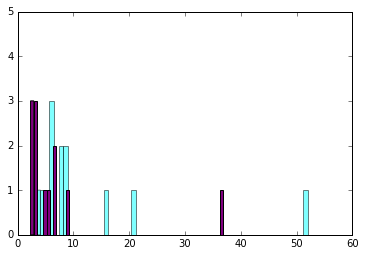

In [20]:
tempos_A2 = list(resultados_A[resultados_A.versao=="A"].delta_t2)
tempos_B2 = list(resultados_B[resultados_B.versao=="B"].delta_t2)
plt.hist(tempos_B2, bins=60, alpha=0.5, color="cyan")
plt.hist(tempos_A2, bins=60, color="purple")

plt.axis([0,60,0,5])

A seguir estão montados todos os boxplots com seus respectivos detalhes, temos a seguir os boxplots para: Tempo gasto na primeira página da Interface A, Tempo gasto na segunda página da Interface A, tempo gasto na primeira página da Interface B e tempo gasto na segunda página da interface B. Vamos colocar todos de uma vez para em seguida fazer as comparações, interpretar e tirar concluções na análise descritiva.

count    12.000000
mean      8.317833
std      16.223344
min       2.040000
25%       2.203250
50%       3.036000
75%       5.171000
max      59.415000
Name: delta_t1, dtype: float64

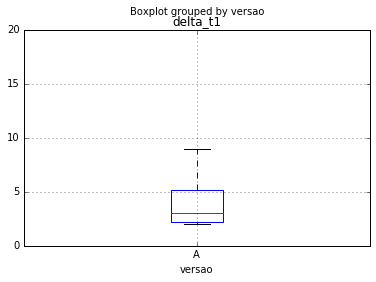

In [21]:
resultados_A.boxplot(column = "delta_t1", by = "versao")
plt.ylim(0, 20)
resultados_A.delta_t1.describe()

count    12.00000
mean      7.21800
std       9.56444
min       2.32700
25%       2.87800
50%       3.98800
75%       6.54325
max      36.84500
Name: delta_t2, dtype: float64

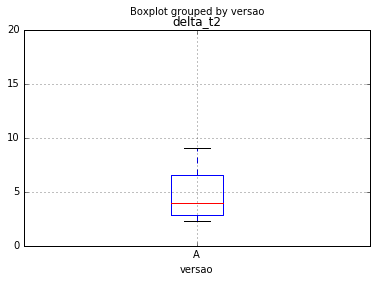

In [22]:
resultados_A.boxplot(column = "delta_t2", by = "versao")
plt.ylim(0, 20)
resultados_A.delta_t2.describe()

count    12.000000
mean      5.659833
std       5.756084
min       1.569000
25%       2.456500
50%       4.229500
75%       6.168250
max      22.510000
Name: delta_t1, dtype: float64

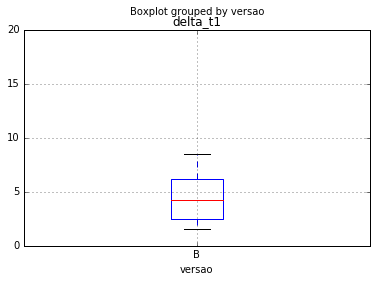

In [23]:
resultados_B.boxplot(column = "delta_t1", by = "versao")
plt.ylim(0, 20)
resultados_B.delta_t1.describe()

count    12.000000
mean     12.242000
std      13.465744
min       3.273000
25%       6.024000
50%       7.810500
75%      10.115250
max      52.041000
Name: delta_t2, dtype: float64

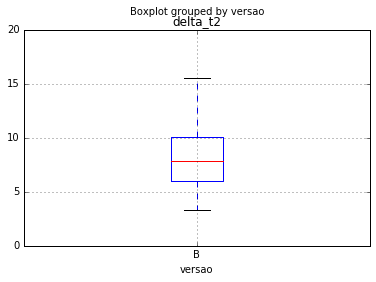

In [24]:
resultados_B.boxplot(column = "delta_t2", by = "versao")
plt.ylim(0, 20)
resultados_B.delta_t2.describe()

As comparações que podemos fazer são:

###### Tempo da primeira página de A versus Tempo da primeira página de B

Podemos perceber que a média de tempo para a interface B é menor que para a interface A, assim podemos concluir que o usuário demora menos tempo para acessar o primeiro item para a interface B, dessa maneira, ela teria uma disposição melhor para se encontrar o item. Como o B está em formato de coluna e o item é um dos primeiros da coluna, ela é visualizado mais rápido do que pela grade onde o usuário está procurando.

###### Tempo da segunda página de A versus Tempo da segunda página de B

Podemos perceber que a média de tempo para a interface A é menor que para a interface B, assim podemos concluir que o usuário demora menos tempo para acessar o primeiro item para a interface A, dessa maneira, ela teria uma disposição melhor para se encontrar o item. Como a quantidade de itens são maiores, e o item a ser procurado está mais abaixo na página B, então o usuário deve descer e procurar o item, enquanto na página A, a disposição em grade mostra todos itens.

###### Tempo da primeira página de A versus Tempo da segunda página de A

Ao observar as médias entre os tempo da primeira página e o tempo da segunda página, na versão A, vemos que a diferença entre os tempos são bem pequenos, isso ocorre devido, aos itens estarem em grade, e na mesma tela. O que mostra que para este modelo, o usuário consegue encontrar os itens de uma forma simples.

###### Tempo da primeira página de B versus Tempo da segunda página de B

Podemos perceber que a média do tempo da primeira página é menor que para o tempo da segunda página, na versão B, diferentemente da conclusão logo acima, o que mostra que ao disponibilizar os itens em coluna, temos o problema que o usuário deve rolar a página para baixo para procurar, levando maior tempo de procura.

### Análise Inferencial

Agora partiremos para a análise inferencial, na análise inferencial estaremos utilizando as informações da nossa amostra para chegarmos a uma conclusão da população toda. Para termos uma noção da população inteira, utilizaremos a distribuição de média amostral, que é pegarmos a nossa amostra, retirar dados dela aleatoriamente, calcular a média das amostras e colocar em um novo histograma. A seguir já estará definida a distribuição de média amostral do tempo na página 1 e 2 das interfaces A e B, além disso colocamos a média e a variância dessas distribuições. 

(array([  4.86510681e-04,   4.70293658e-03,   1.73522143e-02,
          5.27053237e-02,   1.05572818e-01,   1.76441207e-01,
          2.29146531e-01,   2.51039511e-01,   2.37255042e-01,
          2.00928911e-01,   1.46277545e-01,   9.30857102e-02,
          5.74082603e-02,   2.74067683e-02,   1.28114479e-02,
          5.83812817e-03,   2.10821295e-03,   8.10851134e-04,
          1.62170227e-04,   1.62170227e-04]),
 array([  3.35257 ,   3.969206,   4.585842,   5.202478,   5.819114,
          6.43575 ,   7.052386,   7.669022,   8.285658,   8.902294,
          9.51893 ,  10.135566,  10.752202,  11.368838,  11.985474,
         12.60211 ,  13.218746,  13.835382,  14.452018,  15.068654,
         15.68529 ]),
 <a list of 20 Patch objects>)

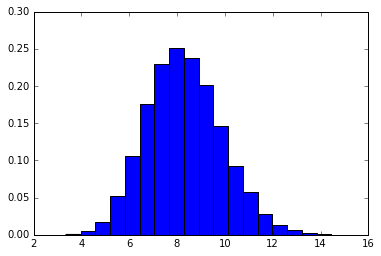

In [25]:
mediaA_t1 = []
for i in range(10000):
    mediaA_t1.append(np.mean(np.random.choice(resultados_A.delta_t1,size = 100)))
x_barra = pd.Series(mediaA_t1)
plt.hist(x_barra, bins = 20, normed = 1)

In [26]:
mediaA_t1 = pd.Series(mediaA_t1)
print("média:",mediaA_t1.mean())
print("variância:",mediaA_t1.var())

média: 8.30052031199996
variância: 2.4131451754103086


(array([ 0.00149654,  0.0041903 ,  0.01646189,  0.06345311,  0.13289235,
         0.22986786,  0.33911495,  0.39059577,  0.43908352,  0.40107152,
         0.33342811,  0.24662905,  0.17569327,  0.10655333,  0.05537181,
         0.03082863,  0.01556397,  0.00778198,  0.00179584,  0.00119723]),
 array([  4.25814 ,   4.592245,   4.92635 ,   5.260455,   5.59456 ,
          5.928665,   6.26277 ,   6.596875,   6.93098 ,   7.265085,
          7.59919 ,   7.933295,   8.2674  ,   8.601505,   8.93561 ,
          9.269715,   9.60382 ,   9.937925,  10.27203 ,  10.606135,
         10.94024 ]),
 <a list of 20 Patch objects>)

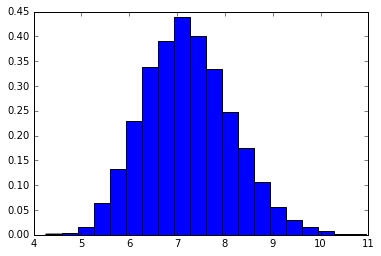

In [27]:
mediaA_t2 = []
for i in range(10000):
    mediaA_t2.append(np.mean(np.random.choice(resultados_A.delta_t2,size = 100)))
x_barra2 = pd.Series(mediaA_t2)
plt.hist(x_barra2, bins = 20, normed = 1)

In [28]:
mediaA_t2 = pd.Series(mediaA_t2)
print("média:",mediaA_t2.mean())
print("variância:",mediaA_t2.var())

média: 7.217191422000031
variância: 0.8435808956913663


(array([ 0.00094842,  0.00711313,  0.03319463,  0.09579021,  0.18636412,
         0.381264  ,  0.57284442,  0.65867625,  0.71605553,  0.67954144,
         0.53585613,  0.35613093,  0.24611445,  0.14510794,  0.06923451,
         0.03414305,  0.01327785,  0.00711313,  0.00237104,  0.00094842]),
 array([ 3.82909  ,  4.0399675,  4.250845 ,  4.4617225,  4.6726   ,
         4.8834775,  5.094355 ,  5.3052325,  5.51611  ,  5.7269875,
         5.937865 ,  6.1487425,  6.35962  ,  6.5704975,  6.781375 ,
         6.9922525,  7.20313  ,  7.4140075,  7.624885 ,  7.8357625,  8.04664  ]),
 <a list of 20 Patch objects>)

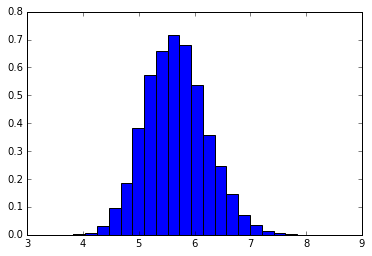

In [29]:
mediaB_t1 = []
for i in range(10000):
    mediaB_t1.append(np.mean(np.random.choice(resultados_B.delta_t1,size = 100)))
x_barra3 = pd.Series(mediaB_t1)
plt.hist(x_barra3, bins = 20, normed = 1)

In [30]:
mediaB_t1 = pd.Series(mediaB_t1)
print("média:",mediaB_t1.mean())
print("variância:",mediaB_t1.var())

média: 5.663390363000001
variância: 0.30358470445512503


(array([  4.72504193e-03,   1.59470165e-02,   4.54785286e-02,
          1.06116567e-01,   1.83095375e-01,   2.58105416e-01,
          2.95905751e-01,   3.01615177e-01,   2.54167881e-01,
          2.03570557e-01,   1.42341888e-01,   7.79631919e-02,
          4.27222542e-02,   2.16564422e-02,   7.67819314e-03,
          5.11879543e-03,   1.77189073e-03,   5.90630242e-04,
          0.00000000e+00,   1.96876747e-04]),
 array([  8.48536 ,   8.993292,   9.501224,  10.009156,  10.517088,
         11.02502 ,  11.532952,  12.040884,  12.548816,  13.056748,
         13.56468 ,  14.072612,  14.580544,  15.088476,  15.596408,
         16.10434 ,  16.612272,  17.120204,  17.628136,  18.136068,  18.644   ]),
 <a list of 20 Patch objects>)

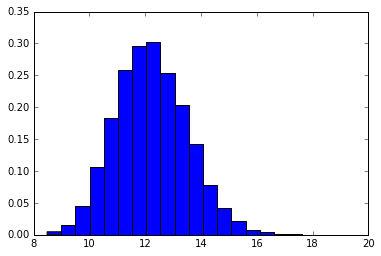

In [31]:
mediaB_t2 = []
for i in range(10000):
    mediaB_t2.append(np.mean(np.random.choice(resultados_B.delta_t2,size = 100)))
x_barra4 = pd.Series(mediaB_t2)
plt.hist(x_barra4, bins = 20, normed = 1)

In [32]:
mediaB_t2 = pd.Series(mediaB_t2)
print("média:",mediaB_t2.mean())
print("variância:",mediaB_t2.var())

média: 12.222248671000022
variância: 1.6751147944907623


O comportamento da população segue o mesmo comportamento da análise descritiva, além disso achamos a variância que determina o intervalo que contem a maior parte das medias amostrais, 63%, de cada situação.

## Conclusão

Primeiramente, a nossa conclusão deve determinar qual interface foi a melhor, para isso estaremos analisando a média da população de cada interface, como temos duas páginas de navegação temos dois taxas de tempo, para a primeira página e para a segunda. Somando o tempo de t1 mais t2, em A temos que o tempo médio total é de 15,5 segundos e para o B, o tempo médio total é de 17.8 segundos, assim a interface A é mais ágil que a B, porém podemos perceber que a Interface B foi mais rápido na primeira página e o A foi mais rápido na segunda página. Isso pode ser explicado pelo número de itens e onde estava o item que o usuário procurava. 

No primeiro caso que B é mais rápido que o A é porque o item que o usuario procurava era um dos primeiros da coluna, assim mais facil de visualizar que a grade de A. No segundo caso em que A é mais rápido na segunda página é porque nessa página contem muito itens e para achar o item no A é mais facil pois esta na grade, ja para no B o usuário necessita utilizar o scroll da página, assim demora mais tempo.

Em geral a interface A foi melhor que a B, porém ela pode ser mais demorada caso o item seja mais fácil se encontrado pela B.